# Content Analytics - Text Classification

**Content Analytics (or Text Mining)** generally refers to a cateogy of data analytics (Machine Learning) techniques and methods focusing on extracting insights from text data. Two types of content analytics are:

- Supervised content analytics (or text mining): Text classification
- Unsupervised content analytics (or text mining): Lexicon-based sentiment analysis

**(Text) Classification** is the task to **train** algorithms (e.g., regression) to classify customer reviews or other types of documents to a pre-determined label (e.g., positive vs. negative, sports vs politics). Some examples of classification tasks are:

- Deciding whether a review is positive or negative  
- Deciding whether an email is spam or not.
- Deciding what the topic of a news article is, from a fixed list of topic areas such as "sports," "technology," and "politics."
http://www.nltk.org/book/ch06.html

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/800/1*ljCBykAJUnvaZcuPYwm4_A.png")

## Business use cases of Text classification

- CB Insights' HR news classification algorithms using supervised machine learning (HR news vs. Non-HR news)
    - Hiring indicates company growth / company plans & strategy
    - Departure of key executives could suggest problems in the company
- Categorizing customer reviews (Customer relationship management [CRM] / Voice of the customers [VOC])
    - Positive reviews vs. Negative reviews (Supervised sentiment analysis)
    - Product-related vs. Service-related
- Categorizing news and social media posts (for investing purposes; supply chain management; risk management)
    - Positive news vs. Negative news
    - Disaster-related vs. Non-disaster
    - Fake news vs Non-fake news
- Categorizing other types of documents
    - Resumes: Qualified workers vs Non-qualified (based on listed skills)
    - ...
    - https://skillsengine.com/home (SkillsEngine) HR Search API

References:
- http://www.datasciencecentral.com/profiles/blogs/5-text-classification-case-studies-using-scikit-learn
<br>
- http://blog.paralleldots.com/text-analytics/text-classification-applications-use-cases/
<br>
- https://www.cbinsights.com/research/team-blog/human-resources-news-classification-machine-learning/
<br>
- http://blog.aylien.com/text-analysis-10-business-use-cases-you-may-not/

# Text Classification Algothims (Classifiers) & Process

<img src="images/machinelearning.gif">

<img src="http://www.nltk.org/images/supervised-classification.png">

- **Features** are **tokens** or **words**
- Algorithms are **trained**. For example:
    - When such words as **amazing** and **best** appears, the review is **positive (95%)**
    - When such words as **terrible** and **worst** appears, the review is **negative (95%)**
    - Google self-driving car
    - Spot

We use an important python package:

- sklearn (or scikit-learn) http://scikit-learn.org/stable/index.html

<img src = "http://scikit-learn.org/stable/_static/ml_map.png">

In [2]:
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import numpy as np
from collections import Counter

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# for gridsearch ... buiild many models with different parameters (e.g., with/without bi-gram)
from sklearn.grid_search import GridSearchCV

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Step 1: Read data

In [3]:
# first column
sms_data = []
# second colummn
sms_labels = []
# both columns
sms = []

openfile = open('data/sampledata_classification.csv', 'rb')

r = csv.reader(openfile)

for i in r:
    sms.append(i)
    sms_data.append(i[0])
    sms_labels.append(i[1])
    
openfile.close()

In [4]:
#entire data
print len(sms)
#texts only
print len(sms_data)
#labels only
print len(sms_labels)

16
16
16


In [5]:
print sms_labels.count('neg')
print sms_labels.count('pos')

8
8


In [6]:
# view first five rows
sms[:5]

[['I love this sandwich.', 'pos'],
 ['this is an amazing place!', 'pos'],
 ['I feel very good about these beers.', 'pos'],
 ['this is my best work.', 'pos'],
 ['what an awesome view', 'pos']]

In [7]:
# view the first row in the dataset

#remember indexing we learning in the python tutorial
sms_data[0]

'I love this sandwich.'

In [8]:
sms_data[:5]

['I love this sandwich.',
 'this is an amazing place!',
 'I feel very good about these beers.',
 'this is my best work.',
 'what an awesome view']

Once we process this data through text preprocessing (e.g., tokenization, removing stopcwords, lowercase)

- 1st document contains 2 valid tokens (love, sandwiche)
- 2nd document contains 2 valid tokens (amazing, place)
- ...

In [9]:
sms_labels[:5]

['pos', 'pos', 'pos', 'pos', 'pos']

## Step 2: Preprocessing & Step 3: Feature Engineering (Words to Vectors)

### Preprocessing

- tokenization
- lowercase
- removing stopwords
- removing short words
- ...

### Feature Engineering (Words to Vectors)

- turn words into numerical feature vectors (or simply assigning numbers to words)
- this is called "bag of words"
- each word or token is called "feature"
- consider a typical corpus (or a collection of customer reviews) ... the number of words would be more than 100,000
- http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### TF, IDF, TFIDF

- TF: measures how frequently a term appears 
    - = Number of times the word appears in a document / Total number of words in the document
<br><br>    
- IDF: measures the relative importance of a word. for example, such words as "at" and "of" frequently appear, but little important. IDF **weight down such frequent terms while scale up the rare words** 
    - = log(total number of documents / number of documents containing the word in question)
<br><br> 
- TFIDF: the importance of words or tokens (or features) in a document
    - = tf * idf
    - tells the importance of words, which is used in classification

#### Example:

- A document (#1) contains 2 words wherein the word **love** appears **once**.
    - **TF** for love is 1 / 2 = 0.5 
<br><br> 
- Now, assume 16 documents and the word "love" appears in **only one document**. 
    - Then, **IDF** is log(16 / 1) = 1.20
    - Thus, **Tf-idf** weight is 0.5 x 1.20 = 0.6020 
<br><br>  
- A document (#2) contains 2 words wherein the word **amazing** appears **once**.
    - **TF** for love is 1 / 2 = 0.5 
<br><br> 
- Now, assume 16 documents and the word "amazing" appears in **two document**. 
    - Then, **IDF** is log(16 / 2) = 0.90
    - Thus, **Tf-idf** weight is 0.5 x 0.90 = 0.4515 
  
### Question: 
 
Which word ("love" or "amazing") would be more informative? Answer: **love** (since this word is quite rare, appearing in only one documents and **higher TFIDF**

"The goal of using **tfidf** instead of the raw frequencies of occurrence of a token in a given document is **to scale down the impact of tokens that occur very frequently in a given corpus** and that are hence empirically **less informative than features that occur in a small fraction of the training corpus**"
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

In [10]:
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(sms_data)
print tfidf.shape
print tfidf

(16, 50)
  (0, 29)	0.657675841497
  (0, 41)	0.367321351165
  (0, 36)	0.657675841497
  (1, 41)	0.309738878146
  (1, 26)	0.360547268532
  (1, 4)	0.482966063159
  (1, 3)	0.482966063159
  (1, 34)	0.554576467399
  (2, 18)	0.370774539408
  (2, 44)	0.425750068072
  (2, 22)	0.370774539408
  (2, 0)	0.425750068072
  (2, 40)	0.425750068072
  (2, 7)	0.425750068072
  (3, 41)	0.310470382646
  (3, 26)	0.361398766256
  (3, 31)	0.393675168137
  (3, 9)	0.555886200243
  (3, 49)	0.555886200243
  (4, 4)	0.449213153406
  (4, 47)	0.515818942009
  (4, 5)	0.515818942009
  (4, 45)	0.515818942009
  (5, 41)	0.285432922908
  (5, 14)	0.445066553795
  :	:
  (10, 22)	0.449213153406
  (10, 39)	0.515818942009
  (10, 6)	0.515818942009
  (10, 46)	0.515818942009
  (11, 31)	0.353286140205
  (11, 14)	0.434439844114
  (11, 32)	0.434439844114
  (11, 17)	0.498855162763
  (11, 27)	0.498855162763
  (12, 1)	0.5
  (12, 19)	0.5
  (12, 12)	0.5
  (12, 43)	0.5
  (13, 3)	0.707106781187
  (13, 18)	0.707106781187
  (14, 26)	0.31794789646

- 17 documents; 77 unique tokens or terms

In [11]:
# removing stopwords

tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore', stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(sms_data)
print tfidf.shape
print tfidf

(16, 32)
  (0, 22)	0.707106781187
  (0, 25)	0.707106781187
  (1, 1)	0.65674041915
  (1, 23)	0.754116716334
  (2, 13)	0.548942934718
  (2, 17)	0.548942934718
  (2, 4)	0.630335869871
  (3, 6)	0.707106781187
  (3, 31)	0.707106781187
  (4, 2)	0.707106781187
  (4, 30)	0.707106781187
  (5, 21)	0.707106781187
  (5, 24)	0.707106781187
  (6, 28)	0.707106781187
  (6, 26)	0.707106781187
  (7, 9)	1.0
  (8, 27)	0.707106781187
  (8, 11)	0.707106781187
  (9, 7)	0.707106781187
  (9, 18)	0.707106781187
  (10, 17)	0.65674041915
  (10, 3)	0.754116716334
  (11, 12)	0.707106781187
  (11, 20)	0.707106781187
  (12, 0)	0.5
  (12, 14)	0.5
  (12, 8)	0.5
  (12, 29)	0.5
  (13, 1)	0.707106781187
  (13, 13)	0.707106781187
  (14, 16)	0.707106781187
  (14, 15)	0.707106781187
  (15, 5)	0.57735026919
  (15, 19)	0.57735026919
  (15, 10)	0.57735026919


In [12]:
# view features or terms

tfidf_vectorizer.get_feature_names()

[u'aint',
 u'amazing',
 u'awesome',
 u'beer',
 u'beers',
 u'believe',
 u'best',
 u'boss',
 u'dandy',
 u'deal',
 u'doing',
 u'enemy',
 u'enjoy',
 u'feel',
 u'feeling',
 u'friend',
 u'gary',
 u'good',
 u'horrible',
 u'im',
 u'job',
 u'like',
 u'love',
 u'place',
 u'restaurant',
 u'sandwich',
 u'stuff',
 u'sworn',
 u'tired',
 u'today',
 u'view',
 u'work']

In [13]:
# which term has the vector value 22

tfidf_vectorizer.get_feature_names()[22]

u'love'

In [14]:
# which terms are vector 22, 24, 25?

from operator import itemgetter
itemgetter(22,24,25)(tfidf_vectorizer.get_feature_names())

(u'love', u'restaurant', u'sandwich')

### Document-Term Matrix (DTM)

This is a matrix view of documents (rows), tokens (columns), and their counts.

In [15]:
# document-term matrix using tfidf

tfidf_matrix = tfidf_vectorizer.fit_transform(sms_data).toarray()
tfidf_matrix

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.70710678,  0.        ,  0.        ,
         0.70710678,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.65674042,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.75411672,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.    

In [16]:
# Document Term Matrix
pd.DataFrame(tfidf_matrix,index=sms_data,columns=tfidf_vectorizer.get_feature_names()).head()

,aint,amazing,awesome,beer,beers,believe,best,boss,dandy,deal,...,love,place,restaurant,sandwich,stuff,sworn,tired,today,view,work
I love this sandwich.,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.707107,0.000000,0.0,0.707107,0.0,0.0,0.0,0.0,0.000000,0.000000
this is an amazing place!,0.0,0.65674,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.754117,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
I feel very good about these beers.,0.0,0.00000,0.000000,0.0,0.630336,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
this is my best work.,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.707107,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.707107
what an awesome view,0.0,0.00000,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.707107,0.000000


## Step 4 Model Building: Training a Classification Model

## Split validation

- In Step 4, we built a model using different machine learning (or classification) algorithms. However, it is a **bad idea to evaluate the performance of the model on the same dataset we train the model on**. Thus, we'll use a validation method called ** split validation**.

- First, we split the dataset to two parts: **training dataset (70% or 80% of the original dataset)** and **testing dataset (30% or 20% of the original dataset)**. We build a model using training dataset and apply the model to testing dataset and measure the accuracy of the model. You could have a 80-20 split or a 50-50 split.

- We will build a predictive model using **x_train** and **y_train**, which are called as **training dataset**.

- Then, we will apply the model to **x_test** and **y_test** (**testing dataset**) and this will tell us the performance or quality of the model

In [17]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.developer.com/imagesvr_ce/6793/ML4.png")

In [18]:
x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(12, 12, 4, 4)

13 documents are used to **train** a classification algorithm (or classifier) of our choice; then, the quality of our classification will be **tested** on the other four documents

In [19]:
# 4 documents (testing dataset)
x_test

['this is an amazing place!',
 'I am tired of this stuff.',
 'he is my sworn enemy!',
 'my boss is horrible.']

In [20]:
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)
print X_train[:2]
print "+++++++++++++++++++++++++++++++++++++++++"
print X_test[:2]

  (0, 11)	0.651520868349
  (0, 1)	0.758630712604
  (1, 2)	0.707106781187
  (1, 23)	0.707106781187
+++++++++++++++++++++++++++++++++++++++++
  (0, 1)	1.0


We're working on **classification problem**. There are **different machine learning algorithms** available for building a predictive model

<img src ="http://amueller.github.io/sklearn_tutorial/cheat_sheet.png">

### Naive Bayes

Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

In [21]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.25

100% accuracy

In [22]:
predicted

array(['pos', 'pos', 'pos', 'pos'],
      dtype='|S3')

In [23]:
print y_test

['pos', 'neg', 'neg', 'neg']


## Step 5. Model Performance Evaluation

In [24]:
print '\n overall accuracy:'
print metrics.accuracy_score(y_test, predicted)

print '\n confusion_matrix:'
print metrics.confusion_matrix(y_test, predicted)

print '\n Here is the classification report:'
print metrics.classification_report(y_test, predicted)


 overall accuracy:
0.25

 confusion_matrix:
[[0 3]
 [0 1]]

 Here is the classification report:
             precision    recall  f1-score   support

        neg       0.00      0.00      0.00         3
        pos       0.25      1.00      0.40         1

avg / total       0.06      0.25      0.10         4



/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


100% classification accuracy ... an ideal classification model ... 
- 1 positive review is correctly classified as positive review
- 3 negative reviews are correctly classificed as negative reviews
- zero misclassification

/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


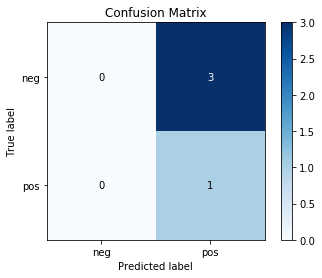

In [25]:
# optional
# using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# !pip install scikit-plot

from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

# How to interpret the results (important !!!)

Assume there are 138 customer reviews. **68 reviews are positive (0). 70 reviews are negative (1)**. 

Consider this result:

**[[65, 5]** 

**[10, 58]]**
 
 - Overall accuracy = **(65 + 58) / 138 = 0.89**   
 - 65 positive reviews classified as positive
 - 58 correctly as negative reviews
 - 5 positive reviews as negative (misclassification) - this is called false positive
 - 10 negative reviews as positive reviews (misclassification) - false negative

## Step 6. Model Deployment

<img src="http://www.nltk.org/images/supervised-classification.png">

To try to predict the outcome on a new document we need to extract the features using almost the same feature extracting chain as before. The difference is that we call transform instead of fit_transform on the transformers, since they have already been fit to the training set:

In [26]:
docs_new = ["I really love donuts",
            "New York is an amazing place to visit.",
            "I am so tired of this food, bad",
            "I can't deal with him any more. He is so mean, bad."]

unlabeled_tfidf = tfidf_vectorizer.transform(docs_new)

predicted = nb.predict(unlabeled_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'I really love donuts' => pos
'New York is an amazing place to visit.' => pos
'I am so tired of this food, bad' => pos
"I can't deal with him any more. He is so mean, bad." => neg


In [27]:
#let's find the probability

predicted_prob = nb.predict_proba(unlabeled_tfidf)

for doc, category in zip(docs_new, predicted_prob):
    print('%r => %s' % (doc, category))

'I really love donuts' => [ 0.31148283  0.68851717]
'New York is an amazing place to visit.' => [ 0.30514172  0.69485828]
'I am so tired of this food, bad' => [ 0.41666667  0.58333333]
"I can't deal with him any more. He is so mean, bad." => [ 0.60700762  0.39299238]


In [28]:
print unlabeled_tfidf

  (0, 19)	1.0
  (1, 1)	1.0
  (3, 8)	1.0


In [31]:
itemgetter(20,18,1,17,4)(tfidf_vectorizer.get_feature_names())

(u'restaurant', u'like', u'amazing', u'job', u'beers')

# Appendix 

## Naive Bayes
- Well handles a large number of variables
- Variables treated as independent (“naïve”), and the relationship between them are not calculated
- Bayesian theorem (probability)
<img src = "images\naive_1.gif">
<img src = "images\naive_2.gif">

# Everything in one cell!

In [18]:
#Step 1. Import the data

print "Step 1. we're importing the data ... "

# movie review in the first column
sms_data = []
# sentiment in the second colummn
sms_labels = []
#both columns
sms = []

openfile = open('data/sampledata_classification.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    sms.append(i)
    sms_data.append(i[0])
    sms_labels.append(i[1])    
openfile.close()

#Step 2. Text preprocessing
print "Step 2. text preprocessing ... "

tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore', stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(sms_data)

#Step 3. Building a predictive text classification model 
print "Step 3. Split validation & Building a predictive text classification model ... "

x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)

nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  
#Naive Bayes algorithm predicts as following

#Step 4. Model evaluation
print "Step 4. Model evaluation ... "
predicted = nb.predict(X_test)

#compare the predictec value with the real values
print "     The model accuracy is: "
print np.mean(predicted == y_test) 

#Step 5. Model deployment & application
print "step 5. Model deployment & application ..."
docs_new = ["I really love donuts",
            "New York is an amazing place to visit.",
            "I am so tired of this food",
            "I can't deal with him any more. He is so mean, bad."]

unlabeled_tfidf = tfidf_vectorizer.transform(docs_new)

predicted = nb.predict(unlabeled_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))


Step 1. we're importing the data ... 
Step 2. text preprocessing ... 
Step 3. Split validation & Building a predictive text classification model ... 
Step 4. Model evaluation ... 
     The model accuracy is: 
0.25
step 5. Model deployment & application ...
'I really love donuts' => pos
'New York is an amazing place to visit.' => pos
'I am so tired of this food' => pos
"I can't deal with him any more. He is so mean, bad." => neg


## How to get most informative features for scikit-learn classifier for different class?
https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names()
for i in feature_names[:10]:
    print i

In [ ]:
#https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c

def most_informative_feature_for_binanry_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print "========================================="

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binanry_classification(tfidf_vectorizer, nb, n=10)

The coef_ attribute of MultinomialNB is a re-parameterization of the naive Bayes model as a linear classifier model. For a binary classification problems this is basically the log of the estimated probability of a feature given the positive class. It means that 

- **higher values mean more important features for the positive class**
- **lower values mean more information features for the negative class**

The above print shows the 
- top 10 lowest values (most important features) for the negative class
- top 10 higest values (most important features) for the positive class

https://stackoverflow.com/questions/29867367/sklearn-multinomial-nb-most-informative-features

# References

- http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
- http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html (Naive Bayes)
- https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c
- http://www.datasciencecentral.com/profiles/blogs/5-text-classification-case-studies-using-scikit-learn
- http://blog.paralleldots.com/text-analytics/text-classification-applications-use-cases/